<h3>Inferential statistics</h3>

<p>Inferential statistcs uses sample data to make prediction about the values of the <b>population parameters</b></p>

<p>Inferential statistics treat parameters as <b>know numbers</b>. This
is artificial, since parameter values are normally unknown or we would not
need inferential methods. However, many <b>inferential methods involve comparing
observed sample statistics to the values expected if the parameter
    values equaled particular numbers</b>. <b>If the data are inconsistent with the particular
parameter values, the we infer that the actual parameter values are
    somewhat different.</b></p>

<h4>1. Probability distributions</h4>

The probability of an event to occur is annoted as 

$$ P(x) $$

$x $ being a given potential event. 

$$ 0\leq P(x) \leq 1 \iff 0 \% \leq P(x) \leq 100\%$$  

<h5> 1.1.The Histogram</h5>

The histogram is the probability distribution of a <b>discrete</b> random variable. It describe propability that a given variable follows in a certain range.

$$P(x^l \leq x \leq x^u)$$

<h5>1.2.The Probability density function: PDF(x) </h5>

The probability density function describes the probability of a <b>continuous</b> random variable. It describes the probability of a variable to follow in a (very tiny infinitesimal) range.

$$ PDF(x) = Pr[a\leq x \leq b] = \int_{a}^{b}f_x(s)ds$$

$f_x(.)$ is the curve that describes the nature of the distribution.

<h5>1.3.The Cumulative density function: CDF(x)</h5>

The cumulative density function describes the probability of a <b>continuous</b> random variable to have values below a certain threshold.

$$ CDF_X(x) = Pr[X \leq x] = \int_{-\infty}^{x}f_x(s)ds$$

<h4>2. The Normal distribution</h4>

The normal distribution describes the probability of a random variable in which one values typically occurs most of the times, with alternative occurences distributed around it with fading probability as we move away from the typical value.

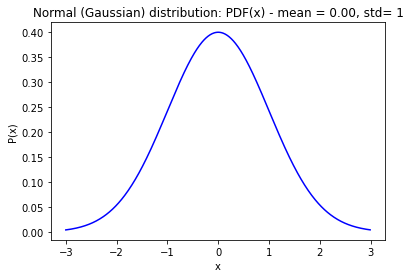

In [12]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1

x = np.arange(mu-3*sigma,mu+3*sigma,step=0.01)
pdf = st.norm.pdf(x,loc=mu,scale=sigma)

plt.figure()
plt.plot(x,pdf,color="b")
plt.title("Normal (Gaussian) distribution: PDF(x) - mean = %.2f, std=%2.f"%(mu,sigma))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

A random variable $X$ following a normal distribution with a mean of $\mu$ and a standard deviation of $\sigma$ is denoted as $X - N(\mu,\sigma)$

$$f_X(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $$

When $\mu=0$ and $\sigma=$, the normal distribution is called the <b>standard normal distribution</b> $N(0,1)$.

<h5>Properties of the normal distribution</h5>

$$P(\mu-\sigma<X<\mu+\sigma) = 0.683$$
$$P(\mu-2*\sigma<X<\mu+2*\sigma) = 0.954$$
$$P(\mu-3*\sigma<X<\mu+3*\sigma) = 0.997$$

Any given random variable $X$ exhibiting normal distribution $N(\mu,\sigma)$ can be converted (i.e. standardised) into a standard normal distribution by 

$$ Z = \frac{X-\mu}{\sigma}$$

Thus, the probabilities of $X$ can be inferred from the <b>standard normal distribution</b>.

$$ P(a\leq X \leq b) = P(\frac{a-\mu}{\sigma} \leq  Z \leq \frac{b-\mu}{\sigma})$$

<b>Exercise 1</b>

The number of calories in a salad on the lunch menu is normally
distributed with mean μ = 200 and standard deviation $\sigma$ = 5. Find
the probability that the salad you select will contain:

(a) More than 208 calories.
(b) Between 190 and 200 calories.


Probability the salad will contain more than 208 calories: 5.48 %


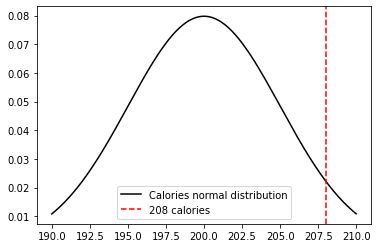

In [25]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

mu = 200
sigma = 5

p_less_208 = st.norm.cdf(208,loc=mu,scale=sigma)
p_a = 1-p_less_208

print("Probability the salad will contain more than 208 calories:",round(p_a*100,2),"%")

x_n = np.arange(mu-2*sigma,mu+2*sigma,step=0.01)
f = st.norm.pdf(x_n,loc=mu,scale=sigma)

plt.figure()
plt.plot(x_n,f,'k', label = 'Calories normal distribution')
plt.axvline(x = 208, color = 'r', linestyle = '--', label = '208 calories')
plt.legend()
plt.show()

<h4>3. The Sampling distribution</h4>
<p>The sampling distribution is a probability distribution that determinines <b>probabilities of the possible values of a sample statistic</b>.</p> !!! <b>The form of the sampling distribution is often known theoretically</b>!!!

<h5>3.1. The Sampling distribution of sample means</h5>

The sampling distribution of sample means has been ascertained by the <b>Central Limit Theorem</b> to exhibits a <b>normal distribution</b>.


<b>Central Limit Theorem: </b> Whatever is the population distribution of the variable $X$, the probability distribution of the sample mean $\hat{X}$ is approximately normal when n is large. That is, when n is large, then

$$\bar{X} \text{ is approximately } N(\mu,\frac{\sigma}{\sqrt{n}})$$

A sampling size of n=30 normally does the job.

<h5>3.2 The confidence interval (assumption: population standard deviation known)</h5>

The confidence interval is an estimation of a range we expect the population mean to fall within with a certain confidence in likelihood. Thus, <b>The confidence interval of the population mean<b> can be estimated from the sample mean as follows:

<img src="media/confidence_interval.png" width="500px"/>

<b>Generic formulation</b>

<img src="media/confidence_interval_b.png" width="400px"/>

<b>Exercise 2</b>
At a factory, batteries are produced with a standard deviation of 3.2 months. In a sample of 81 batteries, the mean life expectancy is 15.6 months. Find a 95% confidence interval estimate for the life expectancy of all batteries produced at the plant.

<h4>4. Hypothesis Testing</h4>

<p>An Hypothesis is a statement about some characteristic of a variable or a collection of variables.</p> <b>Descriptive statistics generate hypotheses which need to be verified.</b>

<h5>4.1 The significance test</h5><br/>
The significance test is a way of statistically testing a hypothesis by comparing the data to values predicted by the hypothesis. <b>Data that fall far from
the predicted values provide evidence against the hypothesis.</b>

Elements of the significanc test:

<ul>
    <li>The <b>null hypothesis: $H_0$</b>: It is the claim that is being made about the data</li>
    <li>The <b>alternative hypothesis $H_a$</b>: It is the negatiion of the null hypothesis</li>
    <li>The <b>test statistic</b>: It is the numerical claim about the data</li>
    <li>The <b>p-value</b>: The probability threshold of the amount of evidence against the null</li>
    <li>The <b>sampling distribution</b>: It is the known (or assumed) sampling distribution of the test statistic</li>
    </ul>

<h5>4.2 The significance test for a population mean</h5>

<b>Assumption</b>

Let a population variable X be normally distributted with the mean $\mu$ unknown and standard deviation $\sigma$ known.


<b>Hypotheses</b>

$$H_0: \mu = \mu_0$$

$$H_a : \mu \neq \mu_0$$

<b>Test statistic (i.e. verification phase)</b>

Compute the sample mean $\bar{X}$ from the data. If $H_0: \mu=\mu_0$ is true, then the center of the sampling distribution should be $\mu_0$. 

The evidence about $H_0$ is the distance of the sample value $\bar{X}$ from the null hypothesis value $\mu_0$, relative to the standard error. An observed value
of $\bar{X}$ falling far out in the tail of this sampling distribution of $\bar{X}$ casts doubt
on the validity of H0, because it would be unlikely to observed value $\bar{x}$ of $\bar{X}$
very far from μ0 if truly μ = μ0.

The test statistic is normally normalised

$$ Z = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$$

<b>p-value</b>

The p-value is the probability of obtaining a z value away from the assumed population mean.


$$ 2.P(Z\geq |z|)=p $$ Z is $N(0,1)$